In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/reviewContent+metadata.csv

[Errno 2] No such file or directory: '/content/reviewContent+metadata.csv'
/content


In [4]:
import numpy as np
import pandas as pd
import itertools


In [5]:
dataset=pd.read_csv("/content/reviewContent+metadataBalanced.csv", encoding="ISO-8859-1",on_bad_lines='skip')
dataset=dataset.astype(str)

In [6]:
dataset.shape
dataset.head(10)

,user_id,prod_id,rating,label,date,text_
0,5044,0,1,0,11/16/2014,"Drinks were bad, the hot chocolate was watered..."
1,5045,0,1,0,9/8/2014,This was the worst experience I've ever had a ...
2,5046,0,3,0,10/6/2013,This is located on the site of the old Spruce ...
3,5047,0,5,0,11/30/2014,I enjoyed coffee and breakfast twice at Toast ...
4,5048,0,5,0,8/28/2014,I love Toast! The food choices are fantastic -...
5,5049,0,5,0,7/16/2013,The egg on an English muffin (their take on eg...
6,5050,0,5,0,3/3/2013,wonderful relaxed vibe and fantastic homemade ...
7,5051,0,1,1,12/5/2014,Extremely slow kitchen. I went with an hour to...
8,5052,0,2,1,11/26/2014,I really wanted to love toast. It's quaint and...
9,5053,0,4,1,11/17/2014,First brunch experience here in Philly (actual...


In [7]:
labels=dataset.label
labels.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: label, dtype: object

In [10]:
dataset.replace(to_replace="0",value="FAKE",inplace=True)
dataset.replace(to_replace="1",value="REAL",inplace=True)

In [11]:
labels=dataset.label
labels.head(10)

0    FAKE
1    FAKE
2    FAKE
3    FAKE
4    FAKE
5    FAKE
6    FAKE
7    REAL
8    REAL
9    REAL
Name: label, dtype: object

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dataset['text_'],labels,test_size=0.2,random_state=10)


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english',max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)

In [14]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')


Accuracy: 68.25%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [15]:
confusion_matrix(y_test,y_pred,labels=['FAKE','REAL'])

array([[10448,  5597],
       [ 4623, 11519]])

80466 POSITIVE REVIEW
80466 NEGATIVE REVIEW


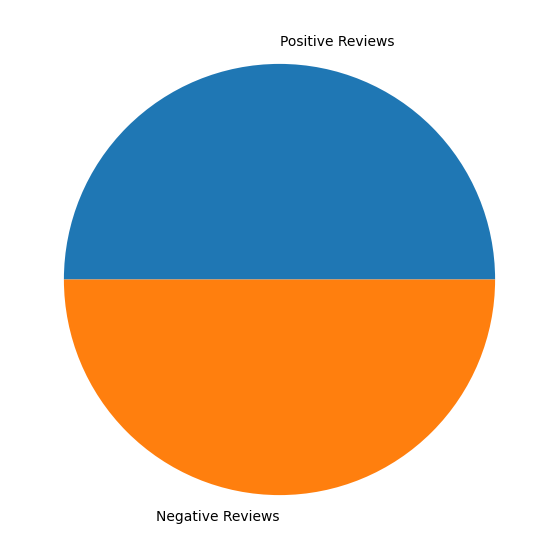

In [16]:
from matplotlib import pyplot as plt
pos=0
neg=0
for score in dataset['label']:
  if score == "REAL":
    pos+=1
  elif score == "FAKE":
    neg+=1

values=[int(pos),int(neg)]
label = ['Positive Reviews','Negative Reviews']

fig = plt.figure(figsize=(10,7))
plt.pie(values,labels=label)
print(pos,"POSITIVE REVIEW")
print(neg,"NEGATIVE REVIEW")

In [17]:
from sklearn.metrics import classification_report

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        FAKE       0.69      0.65      0.67     16045
        REAL       0.67      0.71      0.69     16142

    accuracy                           0.68     32187
   macro avg       0.68      0.68      0.68     32187
weighted avg       0.68      0.68      0.68     32187



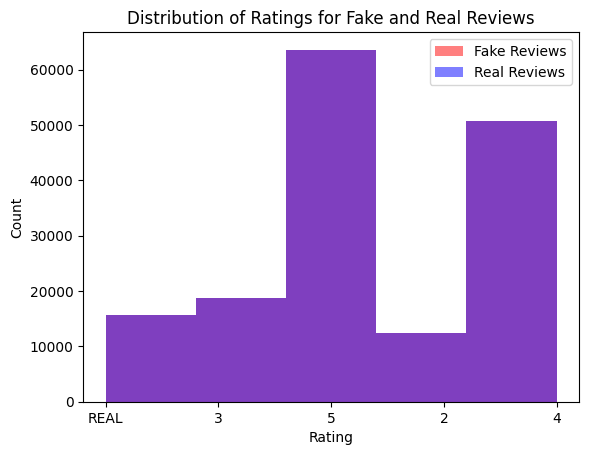

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

plt.hist(dataset['rating'], bins=5, alpha=0.5, label='Fake Reviews', color='red')
plt.hist(dataset['rating'], bins=5, alpha=0.5, label='Real Reviews', color='blue')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(loc='best')
plt.title('Distribution of Ratings for Fake and Real Reviews')
plt.show()

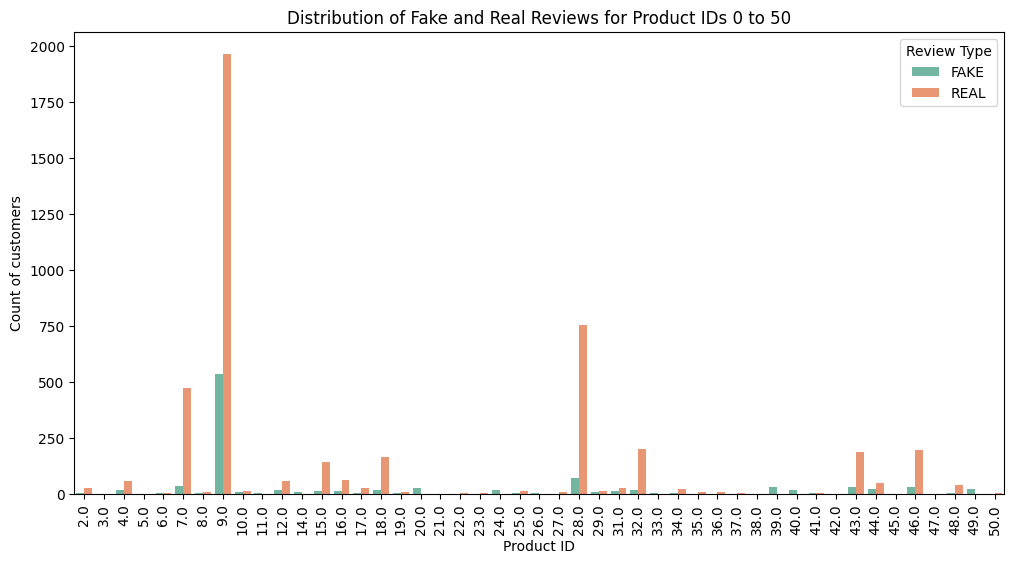

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

start_prod_id = 0  # Change this to your desired starting product ID
end_prod_id = 50   # Change this to your desired ending product ID


dataset['prod_id'] = pd.to_numeric(dataset['prod_id'], errors='coerce')

# Filter the dataset for the specified product ID range
subset_data = dataset[(dataset['prod_id'] >= start_prod_id) & (dataset['prod_id'] <= end_prod_id)]

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.countplot(data=subset_data, x='prod_id', hue='label', palette='Set2')
plt.xlabel('Product ID')
plt.ylabel('Count of customers')
plt.legend(title='Review Type', loc='upper right')
plt.title(f'Distribution of Fake and Real Reviews for Product IDs {start_prod_id} to {end_prod_id}')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()




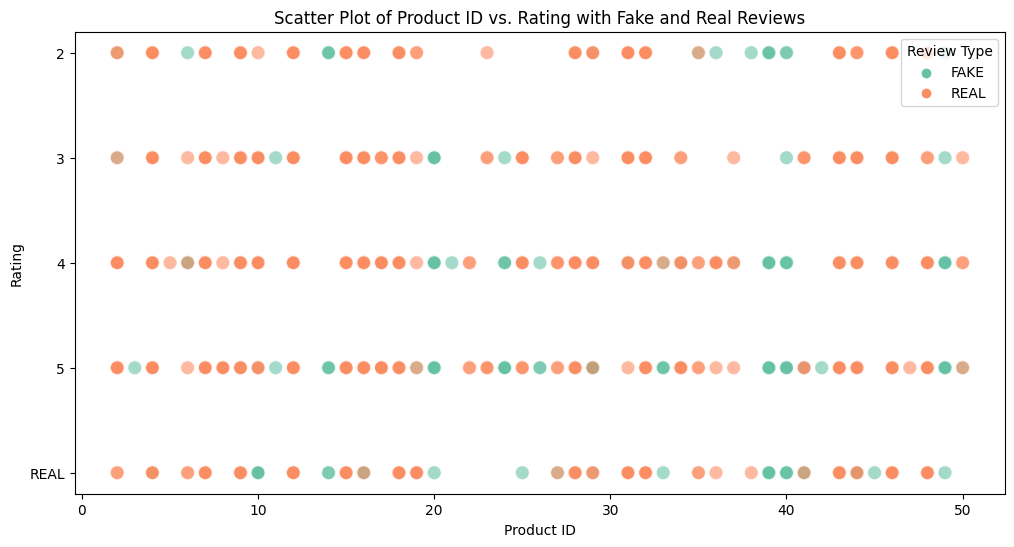

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

start_prod_id = 0  # Change this to your desired starting product ID
end_prod_id = 50   # Change this to your desired ending product ID

# Filter the dataset for the specified product ID range
subset_data = dataset[(dataset['prod_id'] >= start_prod_id) & (dataset['prod_id'] <= end_prod_id)]

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=subset_data, x='prod_id', y='rating', hue='label', palette='Set2', alpha=0.6, s=100)
plt.xlabel('Product ID')
plt.ylabel('Rating')
plt.legend(title='Review Type')
plt.title('Scatter Plot of Product ID vs. Rating with Fake and Real Reviews')

plt.show()

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fake_reviews = dataset[dataset['label'] == -1]
real_reviews = dataset[dataset['label'] == 1]

dataset['prod_id'] = pd.to_numeric(dataset['prod_id'], errors='coerce')
dataset['label'] = pd.to_numeric(dataset['label'], errors='coerce')
dataset['rating'] = pd.to_numeric(dataset['rating'], errors='coerce')

# Group data by 'prod_id' and calculate the average rating for fake and real reviews
avg_ratings = dataset.groupby(['prod_id', 'label'])['rating'].mean().reset_index()

# Create a pivot table for the heatmap
heatmap_data = avg_ratings.pivot(index='prod_id', columns='label', values='rating')

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f")
plt.xlabel('Review Type')
plt.ylabel('Product ID')
plt.title('Average Ratings by Product ID for Fake and Real Reviews')
plt.show()

ValueError: ignored

<Figure size 1200x600 with 0 Axes>

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, x='prod_id', hue='label', palette='Set2')
plt.xlabel('prod_id')
plt.ylabel('Count')
plt.legend(title='Review Type', loc='upper right')
plt.title('Distribution of Fake and Real Reviews by Product ID')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

ValueError: ignored

<Figure size 1200x600 with 0 Axes>